# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Criteria1: The project submission includes all required files.
# Answer: all files are in the repository

---
## Step 0: Load The Data

In [36]:
# Load pickled data
import pickle
import numpy as np
import os

import skimage

# TODO: Fill this in based on where you saved the training and testing data

training_file = r'D:\CarND-Traffic-Sign-Classifier-Project-master\Pics\train.p'
validation_file= r'D:\CarND-Traffic-Sign-Classifier-Project-master\Pics\valid.p'
testing_file = r'D:\CarND-Traffic-Sign-Classifier-Project-master\Pics\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train =train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train, y_train = (X_train-128.)/128., y_train
X_valid, y_valid = (X_valid-128.)/128., valid['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

# Criteria 2: The submission includes a basic summary of the data set.
# Answer: As can be seen from the distribution of different classes, few classes have a lot of test examples and few classes have very few examples. The images are low quality 32x32 pixel images with most of the signs positioned in middle.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [37]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
sampleImg=X_train[0].squeeze()
image_shape = sampleImg.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.



# Criteria 3: The submission includes an exploratory visualization on the dataset.
# Answer: Below is a sample pic and the histogram showing the distribution of classes.

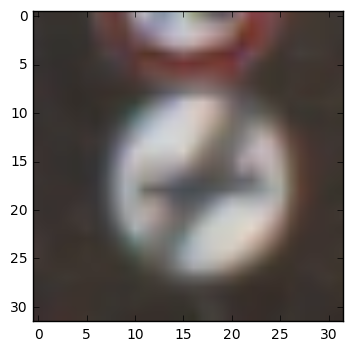

Number of Examples 34799


In [38]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.imshow(sampleImg)
plt.show()
print ('Number of Examples', len(X_train))

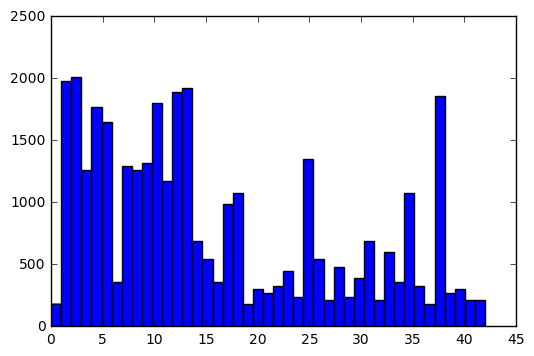

In [39]:
plt.hist(y_train, n_classes)
plt.show()
uniqueArray=np.bincount(y_train)

In [40]:
import time
uniqueArray=np.bincount(y_train)
from skimage import transform
print (X_train.shape)
X_new=[]
Y_new=[]
starttime=time.time()
for i in range(X_train.shape[0]):
    if uniqueArray[y_train[i]]<800:
        #print ('Currently Doing:',i)
        Image=X_train[i]
        rotated_Image=skimage.transform.rotate(Image,20)
        swirl_Image=skimage.transform.swirl(Image)
        X_new.append(rotated_Image)
        X_new.append(swirl_Image)
        Y_new.append(y_train[i])
        Y_new.append(y_train[i])

X_train=np.append(X_train,X_new,axis=0)
y_train=np.append(y_train,Y_new,axis=0)


(34799, 32, 32, 3)


(53037, 32, 32, 3) (53037,)
Size of test images: (53037, 32, 32, 3) (53037,)


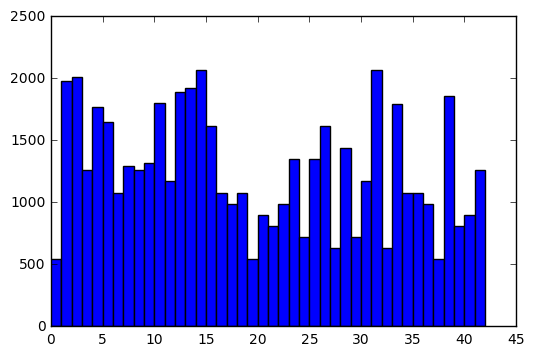

In [41]:
print (X_train.shape,y_train.shape)
print ('Size of test images:', X_train.shape,y_train.shape)
plt.hist(y_train, np.unique(y_train))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [42]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import tensorflow as tf
X_train, y_train = shuffle(X_train, y_train)

# Criteria 4: The submission describes the preprocessing techniques used and why these techniques were chosen.
# Answer : A simple technique of (Image128.)/128. is used and serves well to make the input image well conditioned. 
# For tarffic signs are usually designed to be readable to large group of people (of different age, sex, citizenships, information processing capability and so on). For this reason the traffic signs are easy to read, large and are usually well descernable. Hence normalizing the image by above process usually gives good results.

In [43]:
EPOCHS = 30
BATCH_SIZE = 64

# Criteria 5: The submission provides details of the characteristics and qualities of the architecture, including the type of model used, the number of layers, and the size of each layer. Visualizations emphasizing particular qualities of the architecture are encouraged.
# Answer: The model was trained with Modified LeNet architecture provided by the Udacity. As it does a fairly good job and has a training accuracy above 90%.

# The Lenet architecture has the following layer:
# Input image of 32x21 
# First convolutional Network with filter size 5x5 leading to next laer odf size 28x28x6
# Relu activation
# Maxpool, outputsize 14x14x6
# Second convolutional network again with filter size 5x5 leading to output of 10x10x16
# Relu activation
# Maxpool, outputsize 
# Flattening 1600*1
# Fully connected layer 1600 to 800
# Relu activation
# Fully connected layer 800 to 250
# Relu activation 
# Fully connected layer 250 to 120
# Relu activation 
# Fully connected layer 120 to 84
# Relu activation 
# Output: Fully connected layer 84 to 43

### Model Architecture

In [52]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    tf.add_to_collection('FeatureLayer_Conv1', conv1)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    tf.add_to_collection('FeatureLayer_Conv2', conv2)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    fc1_W_ii = tf.Variable(tf.truncated_normal(shape=(1600, 800), mean = mu, stddev = sigma))
    fc1_b_ii = tf.Variable(tf.zeros(800))
    fc1_ii   = tf.matmul(fc0, fc1_W_ii) + fc1_b_ii
    fc1_ii   = tf.nn.relu(fc1_ii)

    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 250), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(250))
    fc1   = tf.matmul(fc1_ii, fc1_W) + fc1_b
    
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1_W_i = tf.Variable(tf.truncated_normal(shape=(250, 120), mean = mu, stddev = sigma))
    fc1_b_i = tf.Variable(tf.zeros(120))
    fc1_i   = tf.matmul(fc1, fc1_W_i) + fc1_b_i
    fc1_i = tf.nn.relu(fc1_i)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_i, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

# Criteria 6: The submission describes how the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.
# Answer: Different combinations of learning rate and sigma were used. some of the models i tested included linearly varying learning rate. The Neural network was seen to be very sensitive to the learning rate and very unstable. At a certain point in training a large difference in the training accuracy was seen.

# Adam Optimizer was used for the training.

# Underfitting is clearly visible

In [53]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

### Feel free to use as many code cells as needed.
import time

rate = 0.001

logits = LeNet(x)
softmax_logits = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

validationArray=[]
trainingArray=[]

save_file = './Models/lenet_Final_2'
saver = tf.train.Saver()
validation_accuracy = 0.9
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    while validation_accuracy<0.93:
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy=evaluate(X_train,y_train)
        linetosave=EPOCHS,validation_accuracy
        validationArray.append(validation_accuracy)
        trainingArray.append(training_accuracy)
        #print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy), "Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, save_file)
    print("Model saved")


Training...

Training Accuracy = 0.955 Validation Accuracy = 0.856
Training Accuracy = 0.988 Validation Accuracy = 0.899
Training Accuracy = 0.992 Validation Accuracy = 0.913
Training Accuracy = 0.993 Validation Accuracy = 0.910
Training Accuracy = 0.991 Validation Accuracy = 0.924
Training Accuracy = 0.990 Validation Accuracy = 0.898
Training Accuracy = 0.991 Validation Accuracy = 0.910
Training Accuracy = 0.995 Validation Accuracy = 0.927
Training Accuracy = 0.993 Validation Accuracy = 0.906
Training Accuracy = 0.997 Validation Accuracy = 0.940
Model saved


#  Criteria 7: The submission describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.
# Answer: A Validation accuracy of 93% is achieved

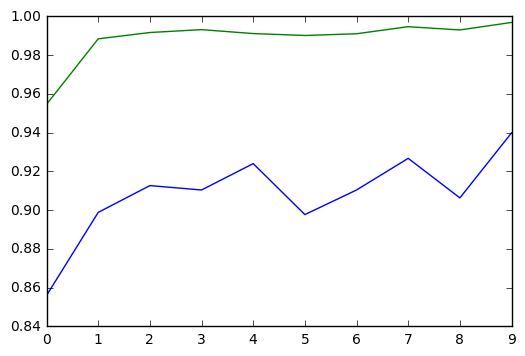

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(validationArray)
df2=pd.DataFrame(trainingArray)
plt.plot(df)
plt.plot(df2)
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

# Criteria 8: The submission includes five new German Traffic signs found on the web, and the images are visualized. Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify.
# Answer: some easy and some difficult images were chosen. Particularly the image of Speed Limit 70kph. The model could confuse between 30,50 and 70 speed limit. Morsoever the traffic sign is to the side and tilted.

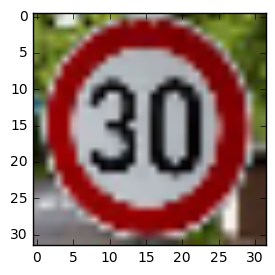

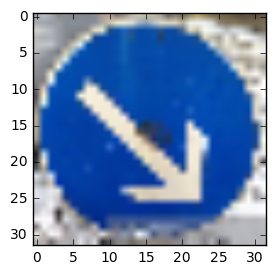

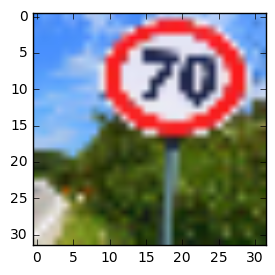

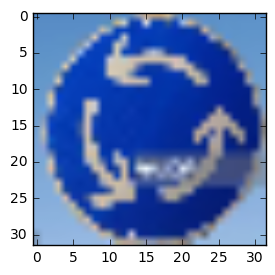

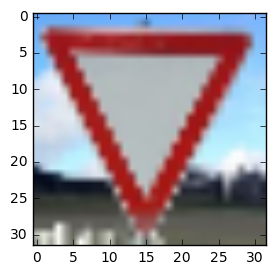

In [55]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from skimage import io,transform
myExamplesDir=r'D:\CarND-Traffic-Sign-Classifier-Project-master\MyExamples'
i=0
fig=plt.figure()
test_pic=[]
for eachfile in os.listdir(myExamplesDir):
    picPath= myExamplesDir+'\\'+eachfile
    plt.figure(figsize=(3,3))
    pic1=skimage.io.imread(picPath)
    pic=skimage.transform.resize(pic1,(32,32))
    test_pic.append(pic)
    plt.imshow(pic)
    
plt.show()
test_pic1=np.array(test_pic)
test_pic2= (test_pic1-128.)/128.





In [85]:
#Here I have written the labels for the above 6 images.

"""
1: Speed Limit 30km
38: Keep right
4: Speed Limit 70kph
40: Roundabout mandatory
14: Stop
13: Yield"""

correct_labels = np.array([[1], [38], [4], [40],[13]])
listCorrect= [1 38 4 40 13]
##test_labels = test_labels.astype(np.float32)
print (test_pic1.shape)

(5, 32, 32, 3)


### Predict the Sign Type for Each Image

In [57]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, save_file)
    prediction=sess.run(tf.argmax(logits,1),feed_dict={x:test_pic1})
    print (prediction)


    


[ 1 32 10 40 13]


### Analyze Performance

In [58]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


correct=0
for i in range (0,5):
    if correct_labels[i]==prediction[i]:
        correct+=1
accuracy=correct/(len(correct_labels))
print('The accuracy on the tested images is:', accuracy*100,'%')
    

The accuracy on the tested images is: 60.0 %


# As expected the model makes a wrong prediction for the 70kph speed limit image.

In [88]:
myArray=(listCorrect==prediction)
print (myArray)

[ True False False  True  True]


# Criteria 9: The submission documents the performance of the model when tested on the captured images. The performance on the new images is compared to the accuracy results of the test set.
# Answer: The model does not behave well on the  test images. A more robust architecture like Alexnet has to be used

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [70]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)
with tf.Session() as sess:
    saver.restore(sess, save_file)
    top=sess.run(top_k,feed_dict={x:test_pic1})
    print (top)

TopKV2(values=array([[  9.99732673e-01,   1.63598364e-04,   5.24674579e-05,
          2.09067475e-05,   1.29815044e-05],
       [  6.59085453e-01,   1.74439132e-01,   7.92041495e-02,
          7.34457374e-02,   7.44377729e-03],
       [  5.42573869e-01,   4.47737038e-01,   3.02041974e-03,
          2.98709748e-03,   1.02509721e-03],
       [  9.29778039e-01,   2.12967992e-02,   9.26022418e-03,
          8.06141272e-03,   4.94336616e-03],
       [  1.00000000e+00,   9.36617783e-10,   4.40848087e-11,
          1.46311904e-13,   1.28056352e-13]], dtype=float32), indices=array([[ 1,  6,  5, 42, 32],
       [32, 12, 36,  1, 28],
       [10, 12, 26, 11, 38],
       [40, 42,  1, 11, 41],
       [13, 15,  1,  9, 38]]))


# As can be seen from the Softmax Probabilities, the model makes correct predictions with good confidence. 

# A certain color blindness is observable in predicting the 'Keep right' board. Its predicted as 'End of all speed limit'

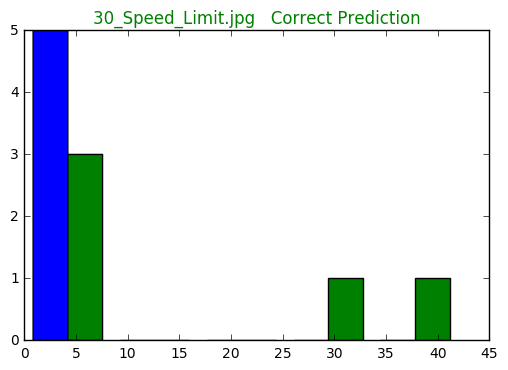

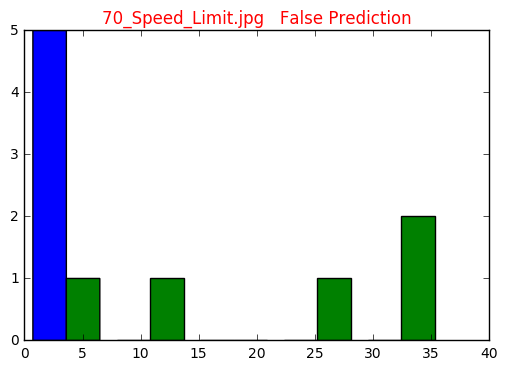

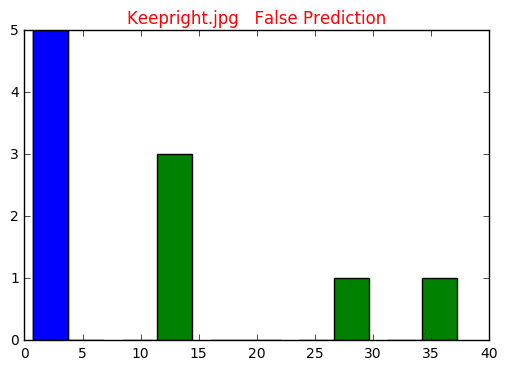

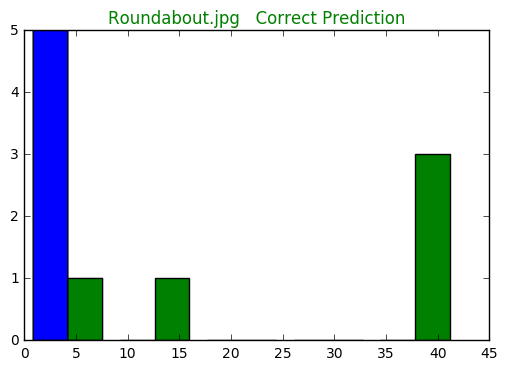

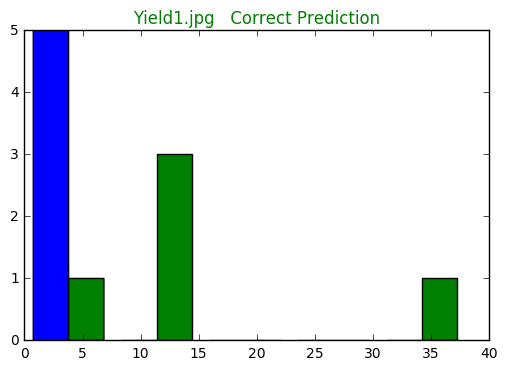

In [133]:
i=0
for eachfile in os.listdir(myExamplesDir):
    plt.title(eachfile)
    plt.hist([top[0][i],top[1][i]],5)
    #plt.xticks(top[1][i])
    if myArray[i]==True:
        plt.title(eachfile+'   Correct Prediction', color='green')
    else:
        plt.title(eachfile+'   False Prediction', color='red')
    i+=1
    plt.show()

In [ ]:
import csv
SignFile=r"C:/Users/User/Desktop/CarND_BehaviorCloning/CarND-Traffic-Sign-Classifier-Project-master/signnames.csv"
with open(SignFile) as f:
    sign_dict = dict(filter(None, csv.reader(f)))
def Signs(label):
    return sign_dict[str(label)]
for i in range (5):
    print ("Correct Label:", Signs(int(correct_labels[i])))
    for j in range (5):        
        print (Signs(top[1][i][j]),top[0][i][j])
    print ("----------------------------")

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [66]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [67]:
print (test_pic[1].shape)
#tf.reset_default_graph()

(32, 32, 3)


In [138]:
import matplotlib.image as mpimg
import cv2
with tf.Session() as sess:
    saver.restore(sess, save_file)
    image1=myExamplesDir+'/'+'Keepright.jpg'
    sample_Image=mpimg.imread(image1)
    sample_Image=cv2.resize(sample_Image,(32,32))
    sample_Image=np.asarray(sample_Image, dtype=np.float32)
    sample_Image=(sample_Image-128.)/128.
    sample_Image = np.expand_dims(sample_Image, axis=0)

    outputFeatureMap(sample_Image, tf.get_collection('FeatureLayer_Conv1')[0])

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\Siddarth\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Siddarth\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-77d98c904c81>", line 75, in <module>
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1520, in placeholder
    name=name)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Siddarth\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


# For some wierd reason, I was not able to get the above function to plot the learned features. But a screen shot of the learned feature is saved in the repository as LearnedFeatures.JPG

<figure>
<img src='LearnedFeatures.JPG', width=800 />
</figure>


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** The trained features of first layer was able to detect major shapes such as a circle, triange, inverted triangle and so on. The easier features of the center can also be detected in the first convolutional layer. Although some filters (FeatureMap 3) of redundant values can be seen which does not add much to the accuracy improvement.

It can be inferred that The first convolution layer detects the majority of the features on any new traffic sign.




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 